# **PARROT**
This notebook includes the necessary Python code to reproduce the figures in the manuscript.

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import math
from scipy.stats import linregress, spearmanr, pearsonr
from sklearn.metrics import roc_curve, auc

**Figure 2:**

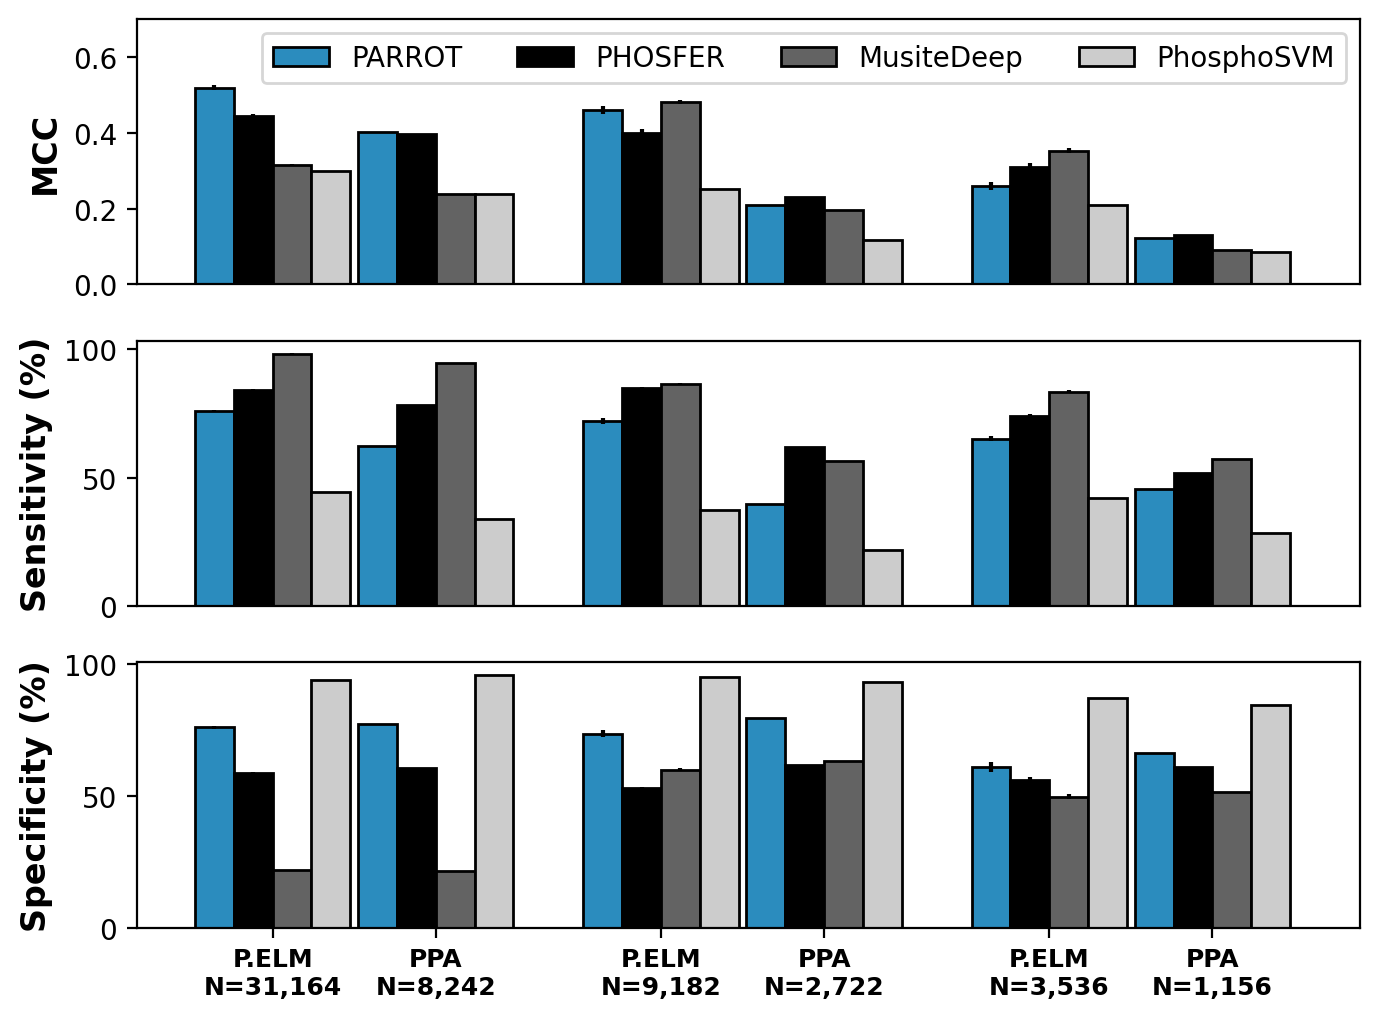

In [3]:
# Panels B-D:
# Color scheme (hexcodes)
black = '#000000'
dark_orange = '#e6550d'
light_orange = '#fd8d3c'
dark_blue = '#08519c'
blue = '#2b8cbe'
light_blue = '#6baed6'
dark_gray = '#636363'
light_gray = '#cccccc'

# Bar graph labels
bar_labels=['PARROT', 'PHOSFER', 'MusiteDeep', 'PhosphoSVM']
# x labels
xlabels = ['P.ELM\nN=31,164', 'PPA\nN=8,242', 'P.ELM\nN=9,182', 
           'PPA\nN=2,722', 'P.ELM\nN=3,536', 'PPA\nN=1,156'] 

# Read in data to DataFrame
df = pd.read_csv('phosphosites/psite_predictor_performance_summary.csv')

# Subset DataFrame into groups to be graphed together
mean_parrot = df[((df['predictor'] == 'parrot') & (df['value'] == 'mean'))]
stderr_parrot = df[((df['predictor'] == 'parrot') & (df['value'] == 'stderr'))]

mean_phosfer = df[((df['predictor'] == 'phosfer') & (df['value'] == 'mean'))]
stderr_phosfer = df[((df['predictor'] == 'phosfer') & (df['value'] == 'stderr'))]

mean_musite = df[((df['predictor'] == 'musitedeep') & (df['value'] == 'mean'))]
stderr_musite = df[((df['predictor'] == 'musitedeep') & (df['value'] == 'stderr'))]

mean_phosphosvm = df[((df['predictor'] == 'phosphoSVM') & (df['value'] == 'mean'))]

# Main plotting function
def plot_peformance_bars(ax, col_name, ylabel, xticklabels=True, legend=True):
    x = np.array([0., 0.42, 1., 1.42, 2, 2.42])  # the xlabel locations
    width = 0.1  # the width of the bars

    parrot = ax.bar(x - 1.5*width, mean_parrot[col_name].values, width, 
                    yerr=np.insert(stderr_parrot[col_name].values, [1,2,3], 0), # fill in empty stderrs
                    color=blue, linewidth=1, edgecolor='black', 
                    label='PARROT')
    phosfer = ax.bar(x - 0.5*width, mean_phosfer[col_name].values, width, 
                    yerr=np.insert(stderr_phosfer[col_name].values, [1,2,3], 0), 
                    color='black', linewidth=1, edgecolor='black', 
                    label='PHOSFER')
    musite = ax.bar(x + 0.5*width, mean_musite[col_name].values, width, 
                    yerr=np.insert(stderr_musite[col_name].values, [1,2,3], 0), 
                    color=dark_gray, linewidth=1, edgecolor='black', 
                    label='MusiteDeep')
    phosphosvm = ax.bar(x + 1.5*width, mean_phosphosvm[col_name].values, width, 
                    color=light_gray, linewidth=1, edgecolor='black', 
                    label='PhosphoSVM')

    if xticklabels:
        ax.set_xticks(x)
        ax.set_xticklabels(xlabels, fontweight='bold', fontsize=9)
    else:
        ax.get_xaxis().set_ticks([])
        
    ax.set_xlim([-0.35, 2.8])
    ax.set_ylabel(ylabel, fontweight='bold', fontsize=12)
    
    if legend:
        ax.set_ylim([0, 0.7])
        ax.legend(loc='upper right', fontsize=10, ncol=4)
        
# Call this function for each subplot B, C, and D
fig, axs = plt.subplots(3, 1, figsize=(7, 5.2), dpi=200)
plot_peformance_bars(axs[0], 'MCC', 'MCC', xticklabels=False, legend=True)
plot_peformance_bars(axs[1], 'sensitivity', 'Sensitivity (%)', xticklabels=False, legend=False)
plot_peformance_bars(axs[2], 'specificity', 'Specificity (%)', legend=False)
plt.tight_layout()

# plt.savefig('phosphosite_performance_barchart.png')

**Figure 3:**

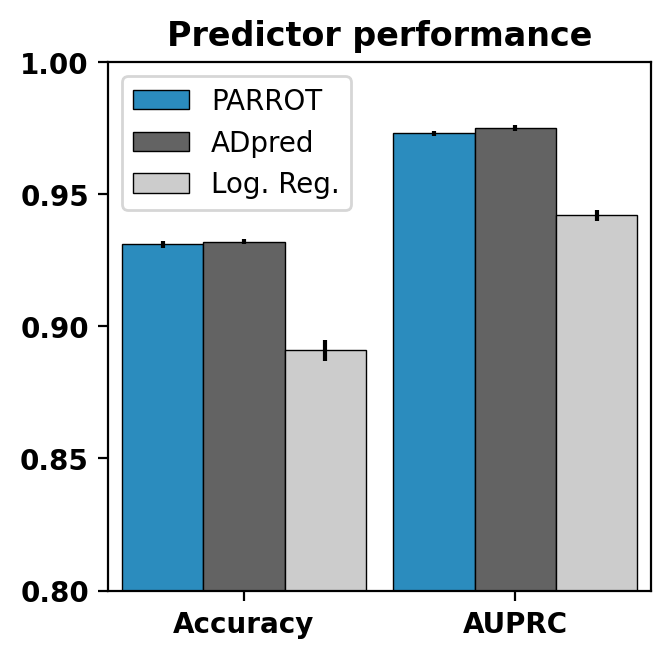

In [29]:
# Panel B:

# Read in data
df = pd.read_csv('activation_domain/AD_prediction_performance_stats.csv')

# Preliminaries:
labels=['Accuracy', 'AUPRC']
x = np.arange(len(labels))
width = 0.3

# Get datapoints associated with full dataset
datapoints = df[df['size'] == 75846]
parrot = datapoints[datapoints['dataset'] == 'PARROT']
ADpred = datapoints[datapoints['dataset'] == 'ADpred']
log_reg = datapoints[datapoints['dataset'] == 'log_reg']

# Bar plot
plt.figure(figsize=(3.5,3.5), dpi=200)
plt.bar(x-width, [parrot['acc'].values[0]/100, parrot['AUPRC'].values[0]], width, 
        yerr=[parrot['acc_stderr'].values[0]/100, parrot['AUPRC_stderr'].values[0]], 
        edgecolor='black', linewidth=0.5, color=blue, label='PARROT')
plt.bar(x, [ADpred['acc'].values[0]/100, ADpred['AUPRC'].values[0]], width, 
        yerr=[ADpred['acc_stderr'].values[0]/100, ADpred['AUPRC_stderr'].values[0]], 
        edgecolor='black', linewidth=0.5, color=dark_gray, label='ADpred')
plt.bar(x+width, [log_reg['acc'].values[0]/100, log_reg['AUPRC'].values[0]], width, 
        yerr=[log_reg['acc_stderr'].values[0]/100, log_reg['AUPRC_stderr'].values[0]], 
        edgecolor='black', linewidth=0.5, color=light_gray, label='Log. Reg.')
plt.xticks(x, labels=labels, fontweight='bold')
plt.ylim([0.8, 1.0])
plt.yticks([0.8, 0.85, 0.9, 0.95, 1], fontweight='bold')
plt.title('Predictor performance', fontweight='bold')
plt.xlim([-0.5, 1.5])
plt.legend(fontsize=10)

# plt.savefig('AD_predictor_performance_barchart.png')

In [30]:
# Run t-test between each of these
from scipy.stats import ttest_ind_from_stats
import math

parrot_acc = parrot['acc'].values[0]
parrot_stddev_acc = parrot['acc_stderr'].values[0] * math.sqrt(5)
parrot_auprc = parrot['AUPRC'].values[0]
parrot_stddev_auprc = parrot['AUPRC_stderr'].values[0] * math.sqrt(5)

ADpred_acc = ADpred['acc'].values[0]
ADpred_stddev_acc = ADpred['acc_stderr'].values[0] * math.sqrt(10)
ADpred_auprc = ADpred['AUPRC'].values[0]
ADpred_stddev_auprc = ADpred['AUPRC_stderr'].values[0] * math.sqrt(10)

log_reg_acc = log_reg['acc'].values[0]
log_reg_stddev_acc = log_reg['acc_stderr'].values[0] * math.sqrt(10)
log_reg_auprc = log_reg['AUPRC'].values[0]
log_reg_stddev_auprc = log_reg['AUPRC_stderr'].values[0] * math.sqrt(10)

print("PARROT vs ADpred")
print('Acc:', ttest_ind_from_stats(mean1=parrot_acc, std1=parrot_stddev_acc, nobs1=5, 
                                   mean2=ADpred_acc, std2=ADpred_stddev_acc, nobs2=10))
print('AUPRC:', ttest_ind_from_stats(mean1=parrot_auprc, std1=parrot_stddev_auprc, nobs1=5, 
                                     mean2=ADpred_auprc, std2=ADpred_stddev_auprc, nobs2=10))

print("\nPARROT vs log_reg")
print('Acc:', ttest_ind_from_stats(mean1=parrot_acc, std1=parrot_stddev_acc, nobs1=5, 
                                   mean2=log_reg_acc, std2=log_reg_stddev_acc, nobs2=10))
print('AUPRC:', ttest_ind_from_stats(mean1=parrot_auprc, std1=parrot_stddev_auprc, nobs1=5, 
                                     mean2=log_reg_auprc, std2=log_reg_stddev_auprc, nobs2=10))


PARROT vs ADpred
Acc: Ttest_indResult(statistic=-0.5864429587908806, pvalue=0.5676218933392544)
AUPRC: Ttest_indResult(statistic=-1.2787572583513127, pvalue=0.22333951486937562)

PARROT vs log_reg
Acc: Ttest_indResult(statistic=6.853743726706158, pvalue=1.1637065421856218e-05)
AUPRC: Ttest_indResult(statistic=10.5239510688377, pvalue=9.91719466356255e-08)


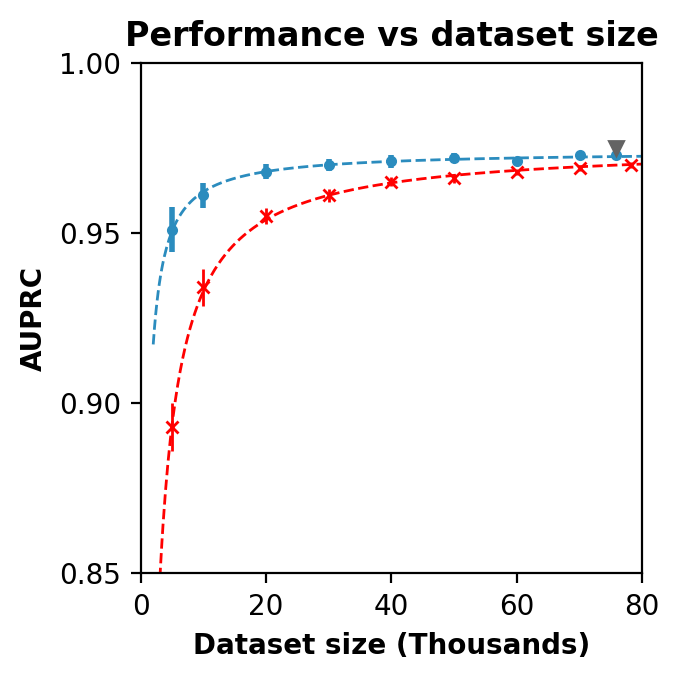

In [44]:
# Panel D / Supplemental Figure 1:

def fit_hyperbola(x, y, x_range):
    # Hyperbola curve fitting
    # y = (m * x) / (k + x)
    inv_x = 1 / x
    inv_y = 1 / y
    slope, intercept = np.polyfit(inv_x, inv_y, 1)
    m = 1 / intercept
    k = slope*m
    ys = (m * x_range) / (k + x_range)
    return ys

# Get data subsets
parrot = df[df['dataset'] == 'PARROT']
combined = df[df['dataset'] == 'PARROT_combined']

                        
# Plot AUPRC vs dataset size
plt.figure(1, figsize=(3.5,3.5), dpi=200)

x_hyperbola = np.linspace(2000, 80000, 400)
y_hyperbola_auprc = fit_hyperbola(parrot['size'].values, parrot['AUPRC'].values, x_hyperbola)
                        
plt.plot(x_hyperbola, y_hyperbola_auprc, '--', c=blue, linewidth=1)
plt.errorbar(parrot['size'].values, parrot['AUPRC'].values, 
                yerr=parrot['AUPRC_stderr'].values, fmt='o', 
                c=blue, markersize=3, linewidth=2)
plt.errorbar(ADpred['size'].values, ADpred['AUPRC'].values, 
                yerr=ADpred['AUPRC_stderr'].values, c=dark_gray, 
                fmt='v', markersize=5)

plt.title('Performance vs dataset size', fontweight='bold')
plt.xticks([0, 20000, 40000, 60000, 80000], labels=['0', '20', '40', '60', '80'])
plt.xlim([0, 80000])
plt.xlabel('Dataset size (Thousands)', fontweight='bold')

plt.ylabel('AUPRC', fontweight='bold')
plt.ylim([0.85, 1.0])
plt.yticks([0.85, 0.9, 0.95, 1])

plt.tight_layout()

# Uncomment this to plot Supplemental Figure 1
"""
plt.errorbar(combined['size'].values, combined['AUPRC'].values, 
                yerr=combined['AUPRC_stderr'].values, fmt='rx', 
                markersize=4, linewidth=1)
plt.plot(x_hyperbola, fit_hyperbola(combined['size'].values, 
                combined['AUPRC'].values, x_hyperbola), 'r--', linewidth=1)
"""

# plt.savefig('AUPRC_vs_dataset_size.png')
# plt.savefig('SUP1_AUPRC_vs_dataset_size.png')

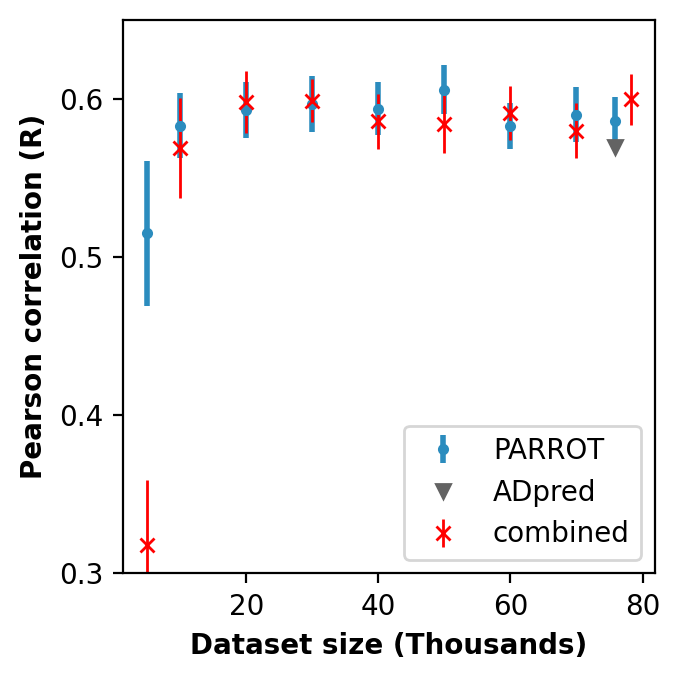

In [46]:
# Plot performance on Staller data  
plt.figure(figsize=(3.5, 3.5), dpi=200)
                      
plt.errorbar(parrot['size'].values, parrot['StallerR'].values, 
                yerr=parrot['StallerR_stderr'].values, fmt='o', c=blue,
                markersize=3, linewidth=2, label='PARROT')
plt.errorbar(ADpred['size'].values, ADpred['StallerR'].values, 
                c=dark_gray, fmt='v', markersize=5, label='ADpred')

# plt.title('Performance vs dataset size', fontweight='bold')
plt.xlabel('Dataset size (Thousands)', fontweight='bold')
plt.xticks([0, 20000, 40000, 60000, 80000], labels=['0', '20', '40', '60', '80'])


plt.ylabel("Pearson correlation (R)", fontweight='bold')
plt.ylim([0.3, 0.65])
plt.yticks([0.3, 0.4, 0.5, 0.6])


# Uncomment this to plot Supplemental Figure 1
"""
plt.errorbar(combined['size'].values, combined['StallerR'].values, 
                yerr=combined['StallerR_stderr'].values, fmt='rx', 
                markersize=5, linewidth=1, label='combined')
"""

plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('stallerR_vs_dataset_size.png')
# plt.savefig('SUP1_stallerR_vs_dataset_size.png')

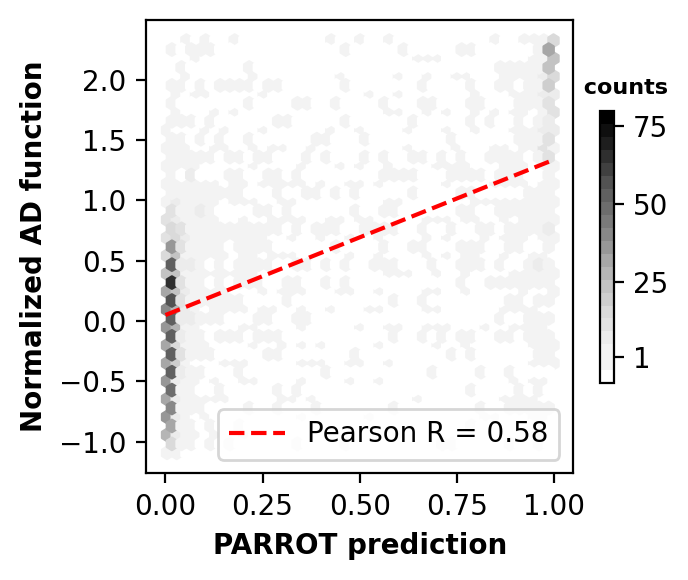

In [72]:
# Panel C:

# Read in Staller data and PARROT predictions
def read_file(filename):
    with open(filename) as f:
        values = [float(x.rstrip().split()[2]) for x in f]
    return np.array(values)

true_vals = read_file('activation_domain/staller_yeast_ad_data.tsv')
parrot_preds = read_file('activation_domain/parrot_predictions_staller_data.tsv')
slope, intercept, r_value, p_value, std_err = linregress(parrot_preds, true_vals)
spearman_r, pval = spearmanr(parrot_preds, true_vals)

# Color bar bounds
bounds1= np.linspace(0, 1, 2)
bounds2 = np.linspace(1, 80, 20)
bounds = np.concatenate((bounds1, bounds2))
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

# Plot
fig, ax = plt.subplots(figsize=(3.6,3), dpi=200)
hb = ax.hexbin(parrot_preds, true_vals, gridsize=40, cmap='Greys', norm=norm)
ax.plot([0,1], [intercept, intercept+slope], 'r--', label='Pearson R = %.2f' % r_value)

cb = fig.colorbar(hb, ax=ax, ticks=[1, 25, 50, 75], shrink=0.6)
cb.ax.set_title('     counts', fontweight='bold', fontsize=8)

ax.legend(loc='lower right')
# ax.set_title('Staller et al. predictions', fontweight='bold')
ax.set_xlabel('PARROT prediction', fontweight='bold')
ax.set_ylabel('Normalized AD function', fontweight='bold')

plt.tight_layout()

# plt.savefig('staller_hexbin.png')

**Supplemental Figure 2:**

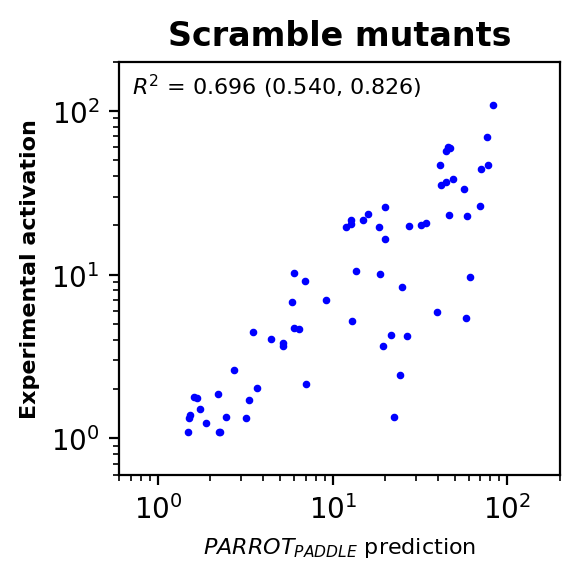

In [8]:
############# CHANGE for different subplots ###############
# {'all', 'tile', 'scramble', 'Pdr1'}
MODE = 'scramble'

# {'all', 'TF tiles', 'Scramble mutants', 'Pdr1 variants'}
title = 'Scramble mutants'

# {'paddle', 'parrot_adpred', 'parrot_paddle'}
predictor = 'parrot_paddle'

###########################################################

# Helper functions
def read_file(tsv, mode, z_score):
    # mode should be 'all', 'tile', 'scramble', or 'Pdr1'
    with open(tsv) as f:
        lines = [x.strip().split() for x in f]

    names = [line[0] for line in lines]
    vals = [float(line[2]) for line in lines]

    if mode == 'all':
        return names, vals

    elif mode == 'tile':
        new_names = []
        new_vals = []
        for i in range(len(names)):
            if names[i][:7] == 'A_tiles':
                new_names.append(names[i])
                new_vals.append(vals[i])

        new_vals = np.array(new_vals)
        if not z_score:
            return new_names, new_vals
        else:
            # Transform z-score (Z) to activation score (A):
            # A = e^(Z-0.00015)/2.45362
            new_vals = (new_vals - 0.00015)/2.45362
            return new_names, np.exp(new_vals)

    elif mode == 'scramble':
        new_names = []
        new_vals = []
        for i in range(len(names)):
            if names[i][-9:-1] == 'Scramble':
                new_names.append(names[i])
                new_vals.append(vals[i])

        new_vals = np.array(new_vals)
        if not z_score:
            return new_names, new_vals
        else:
            return new_names, np.exp(((new_vals - 0.00015) / 2.45362))

    elif mode == 'Pdr1':
        new_names = []
        new_vals = []
        for i in range(len(names)):
            if names[i][:10] == 'B_homologs' or names[i][:9] == 'B_Pdr1mut':
                new_names.append(names[i])
                new_vals.append(vals[i])

        new_vals = np.array(new_vals)
        if not z_score:
            return new_names, new_vals
        else:
            return new_names, np.exp(((new_vals - 0.00015) / 2.45362))

# Calculate bootstrap confidence intervals for R^2 value
def R_squared_bootstrapping(x, y, n_iter, CI):
    pearson_rs = []
    x = np.array(x)
    y = np.array(y)

    for i in range(n_iter):
        sample = np.random.choice(len(x), size=len(x), replace=True)
        r, p = pearsonr(x[sample], y[sample])
        pearson_rs.append(r)
    pearson_rs = np.array(pearson_rs)
    pearson_rs.sort()

    tails = (1 - CI) / 2
    lower_bound = pearson_rs[int(np.around(tails*n_iter))]
    upper_bound = pearson_rs[int(n_iter - np.round(tails*n_iter))]
    return lower_bound, upper_bound

######################################

# Ground truth experimental values
names, true_vals = read_file('activation_domain/paddle_test.tsv', mode=MODE, z_score=True)

# PADDLE predictions
if predictor == 'paddle':
    xlabel = 'PADDLE prediction'
    
    # Read in Paddle predictions
    df = pd.read_csv('activation_domain/PADDLE_comparison_testset.csv')
    paddle_preds_z = {}
    for idx, row in df.iterrows():
        paddle_preds_z[row['name']] = row['predicted Z score']

    paddle_preds_act = {}
    for key, val in paddle_preds_z.items():
        paddle_preds_act[key] = np.exp(((val - 0.00015) / 2.45362))
    preds = []
    for name in names:
        preds.append(paddle_preds_act[name])
    preds = np.array(preds)
    
    X = np.log(preds)
        
# Trained on ADpred data
elif predictor == 'parrot_adpred':
    xlabel = '$PARROT_{ADpred}$ prediction'
    names, preds = read_file('activation_domain/parrot_comparison_testset.tsv', mode=MODE, z_score=False)
    X = preds

# Trained on PADDLE data
elif predictor == 'parrot_paddle':
    xlabel = '$PARROT_{PADDLE}$ prediction'
    names, preds = read_file('activation_domain/paddleTrainAD_comparison_testset.tsv', mode=MODE, z_score=True)
    X = np.log(preds)

##########################################################
# Plot
plt.figure(figsize=(3, 3), dpi=200)
plt.scatter(preds, true_vals, s=3, c='blue')
plt.xlabel(xlabel, fontsize=8)
plt.ylabel('Experimental activation', fontweight='bold', fontsize=8)
plt.yscale('log')
plt.ylim([0.6,200])
plt.title(title, fontweight='bold', fontsize=12)

# Log scale
if predictor != 'parrot_adpred':
    plt.xscale('log')
    plt.xlim([0.6,200])

# R^2 value and confidence interval
r_val, p_val = pearsonr(X, np.log(true_vals))
lower_CI, upper_CI = R_squared_bootstrapping(X, np.log(true_vals), n_iter=10000, CI=0.95)
txt = '$R^2$ = %.3f (%0.3f, %0.3f)' % (r_val**2, lower_CI**2, upper_CI**2)
plt.annotate(txt, xy=(0.03, 0.92), xycoords='axes fraction', fontsize=8)

plt.tight_layout()
plt.show()

**Figure 4:**

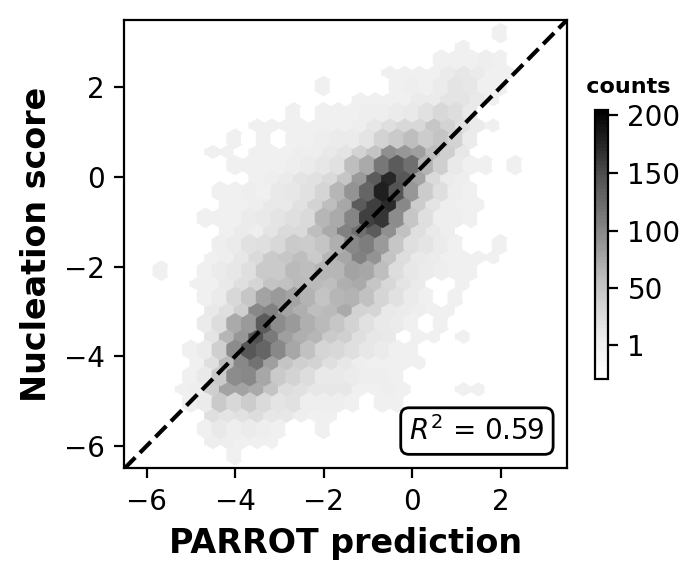

In [88]:
# Panel B:

def parse_predictions_file(file):
    with open(file) as f:
        lines = [x.rstrip().split() for x in f]
    pred_data = []
    for i in range(0, len(lines), 2):
        pred_data.append([lines[i][0][:-5], lines[i][1], lines[i][2], lines[i+1][2]])
    return pred_data

# Read in data
data = parse_predictions_file('ab_nucleation/AB_variant_predictions.tsv')
df = pd.DataFrame(data, columns=['name', 'seq', 'pred', 'true'])

# Sort data into single and double mutants sets
single_mask = df['name'].str.len() < 5
double_mask = df['name'].str.len() > 5
singles_df = df.loc[single_mask]
doubles_df = df.loc[double_mask]

# Helper function - R^2
def get_r_squared(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return r_value ** 2

# Function for plotting 
def hex_scatter(x, y, plot_range, gridsize, title, x_label, 
                y_label, num_lower, num_upper, upper_bound, 
                tick_labels, plotsize=(3.6, 3), savefig=False):
    
    r_squared = get_r_squared(x, y)

    bounds1= np.linspace(0, 1, num_lower)
    bounds2 = np.linspace(1, upper_bound, num_upper)
    bounds = np.concatenate((bounds1, bounds2))
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

    fig, ax = plt.subplots(figsize=plotsize, dpi=200)
    hb = ax.hexbin(x, y, gridsize=gridsize, cmap='Greys', 
                   extent=plot_range*2, norm=norm)
    
    # Line of perfect prediction
    ax.plot(plot_range, plot_range, 'k--')
    
    # Display R^2 value
    ax.annotate('$R^2$ = %.2f' % r_squared, xy=(0.95, 0.05), 
                xycoords='axes fraction',
                size=10, ha='right', va='bottom',
                bbox=dict(boxstyle='round', fc='w'))

    ax.set_title(title, fontweight='bold', fontsize=14)
    ax.set_xlabel(x_label, fontweight='bold', fontsize=12)
    ax.set_ylabel(y_label, fontweight='bold', fontsize=12)
    ax.set(xlim=plot_range, ylim=plot_range)
    cb = fig.colorbar(hb, ax=ax, ticks=tick_labels, shrink=0.6)
    cb.ax.set_title('       counts', fontweight='bold', fontsize=8)

    plt.tight_layout()
    
    if savefig:
        plt.savefig(savefig)

# Plot Panel B:
hex_scatter(df['pred'].values.astype(np.float), 
            df['true'].values.astype(np.float), 
            [-6.5, 3.5], gridsize=30, title='', 
            x_label='PARROT prediction', y_label='Nucleation score',
            num_lower=10, num_upper=70, upper_bound=205, 
            tick_labels=[1, 50, 100, 150, 200]) #, savefig='AB42_hexbin_all.png')

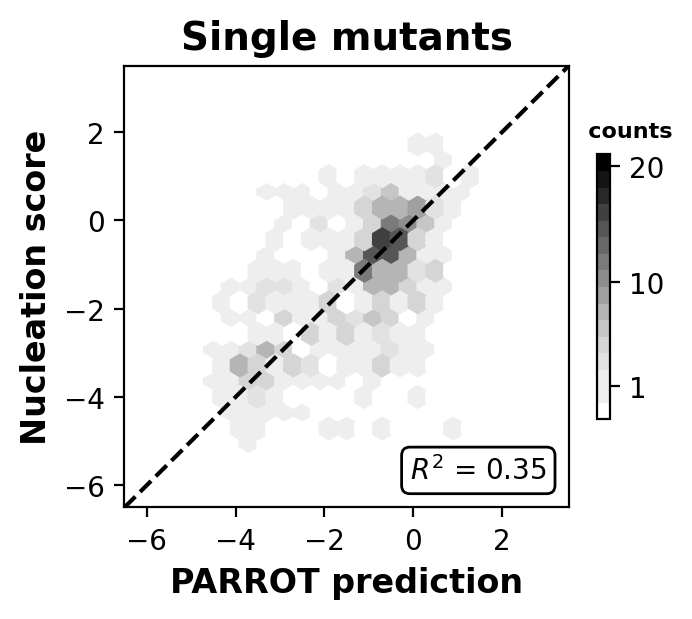

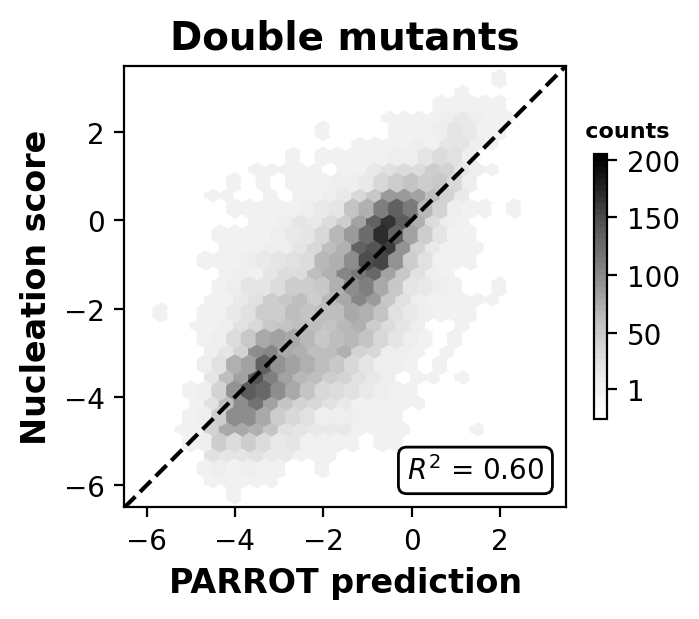

In [89]:
# Supplemental Figure 3:
hex_scatter(singles_df['pred'].values.astype(np.float), 
            singles_df['true'].values.astype(np.float), 
            [-6.5, 3.5], gridsize=25, title='Single mutants', 
            x_label='PARROT prediction', y_label='Nucleation score',
            num_lower=2, num_upper=15, upper_bound=21, 
            tick_labels=[1, 10, 20], plotsize=(3.6, 3.2)) #, savefig='SUP2_AB42_hexbin_single.png')

hex_scatter(doubles_df['pred'].values.astype(np.float), 
            doubles_df['true'].values.astype(np.float), 
            [-6.5, 3.5], gridsize=30, title='Double mutants', 
            x_label='PARROT prediction', y_label='Nucleation score',
            num_lower=5, num_upper=40, upper_bound=205, 
            tick_labels=[1, 50, 100, 150, 200], plotsize=(3.6, 3.2)) #, savefig='SUP2_AB42_hexbin_double.png')

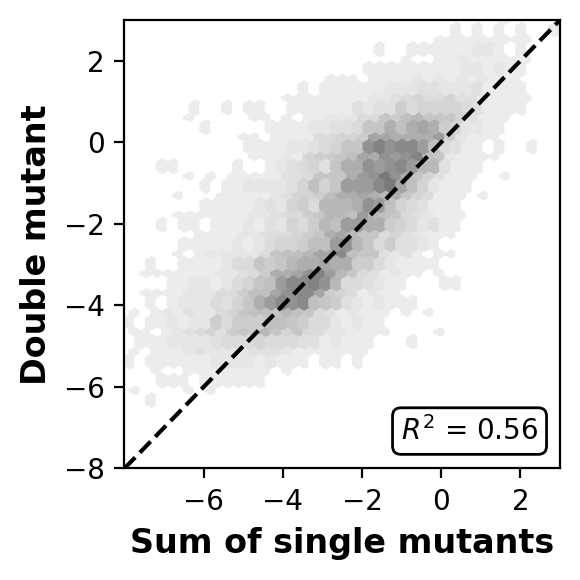

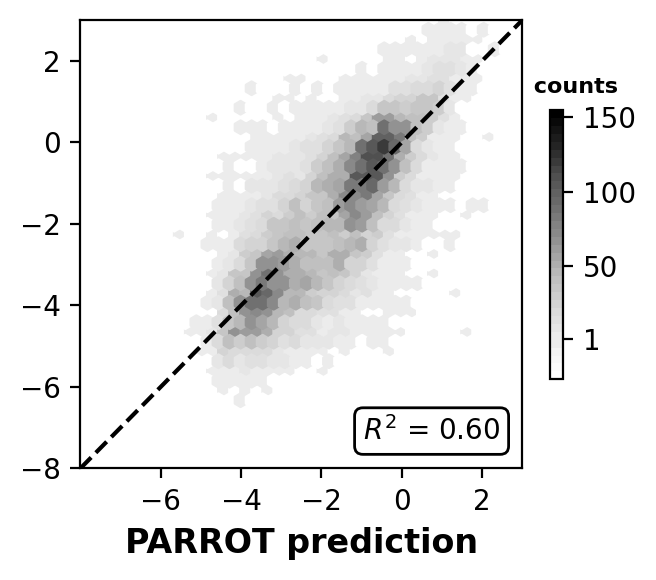

In [128]:
# Panel C: "epistasis"
def graph_epistasis(singles_df, doubles_df, mode='sum', savefig1=False, savefig2=False):
    # Make data structure with single mutants true values
    single_muts = []
    for i in range(42):
        single_muts.append({})
    for i in range(len(singles_df)):
        mut = singles_df.iloc[i]
        aa = mut['name'][-1]
        pos = int(mut['name'][1:-1])
        single_muts[pos-1][aa] = float(mut['true'])

    true_vals = []
    single_combinations = []
    epi_preds = []

    # Plot double mutants that are two observed single muts
    for i in range(len(doubles_df)):
        dmut = doubles_df.iloc[i]
        names = dmut['name'].split('_')

        indiv_muts = []
        for name in names:
            aa = name[-1]
            pos = int(name[1:-1])

            if aa in single_muts[pos-1]:
                indiv_muts.append(single_muts[pos-1][aa])

        if len(indiv_muts) == 2:
            true_vals.append(float(dmut['true']))
            epi_preds.append(float(dmut['pred']))

            # SUM MEAN MIN MAX options
            if mode=='sum':
                single_combinations.append(np.sum(indiv_muts))
                label_txt = 'Sum of single mutants'
            elif mode=='avg':
                single_combinations.append(np.mean(indiv_muts))
                label_txt = 'Avg of single mutants'
            elif mode == 'min':
                single_combinations.append(np.min(indiv_muts))
                label_txt = 'Min of single mutants'
            elif mode == 'max':  
                single_combinations.append(np.max(indiv_muts))
                label_txt = 'Max of single mutants'
            else:
                return 1 

        else:
            # Debugging
            print(names)


    # Colorbar normalization
    bounds1= np.linspace(0, 1, 5)
    bounds2 = np.linspace(1, 155, 30)
    bounds = np.concatenate((bounds1, bounds2))
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

    # Plot combination vs true val
    fig1, ax1 = plt.subplots(figsize=(3,3), dpi=200)
    ax1.plot([-8,3], [-8, 3], 'k--') # y=x line
    ax1.hexbin(single_combinations, true_vals, gridsize=40, cmap='Greys', 
                    extent=(-8,3,-8,3), norm=norm)
    ax1.set(xlim=[-8, 3], ylim=[-8, 3])
    ax1.annotate('$R^2$ = %.2f' % get_r_squared(single_combinations, true_vals),
                    xy=(0.95, 0.05), xycoords='axes fraction', size=10,
                    ha='right', va='bottom', bbox=dict(boxstyle='round', fc='w'))
    ax1.set_xlabel(label_txt, fontweight='bold', size=12)
    ax1.set_ylabel('Double mutant', fontweight='bold', size=12)
    ax1.set_xticks([-6, -4, -2, 0, 2])
    plt.tight_layout()
    if savefig1:
        plt.savefig(savefig1)

    # Plot PARROT pred vs true val
    fig2, ax2 = plt.subplots(figsize=(3.4, 3), dpi=200)
    ax2.plot([-8,3], [-8, 3], 'k--')
    hb = ax2.hexbin(epi_preds, true_vals, gridsize=40, cmap='Greys', 
                    extent=(-8,3,-8,3), norm=norm)
    ax2.set(xlim=[-8, 3], ylim=[-8, 3])
    ax2.annotate('$R^2$ = %.2f' % get_r_squared(epi_preds, true_vals),
                    xy=(0.95, 0.05), xycoords='axes fraction', size=10,
                    ha='right', va='bottom', bbox=dict(boxstyle='round', fc='w'))
    ax2.set_xlabel('PARROT prediction', fontweight='bold', size=12)
    ax2.set_xticks([-6, -4, -2, 0, 2])
    
    # Uncomment to display colorbar
    cb = fig.colorbar(hb, ax=ax2, ticks=[1, 50, 100, 150], shrink=0.6)
    cb.ax.set_title('     counts', fontweight='bold', size=8)
    
    plt.tight_layout()
    if savefig2:
        plt.savefig(savefig2)
    
    return single_combinations, epi_preds, true_vals

x1, x2, y = graph_epistasis(singles_df, doubles_df, mode='sum')  
#                             savefig1='AB42_sum_epistasis.png', 
#                              savefig2='AB42_PARROT_epistasis.png')

In [84]:
import scipy.stats as st

def correlation_bootstrap(x1, x2, y):
    nobs = len(y)
    
    diffs = []
    for i in range(10000):
        samp = np.random.choice(nobs, size=nobs, replace=True)
        cor1 = pearsonr(x1[samp], y[samp])[0]
        cor2 = pearsonr(x2[samp], y[samp])[0]
        diffs.append(cor2 - cor1)
    
    diffs.sort()
    CI_str = '99% CI: (' + str(round(diffs[50], 4)) + ', ' + str(round(diffs[9949], 4)) + ')'
    print(CI_str)
        
correlation_bootstrap(np.array(x1), np.array(x2), np.array(y))

99% CI: (0.0159, 0.034)


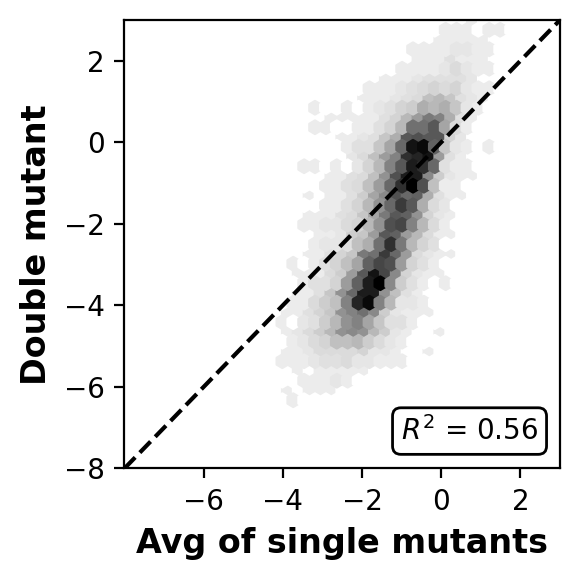

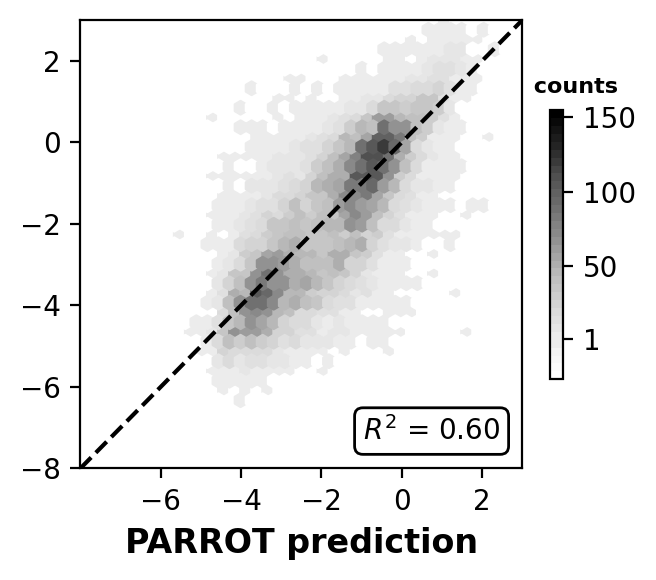

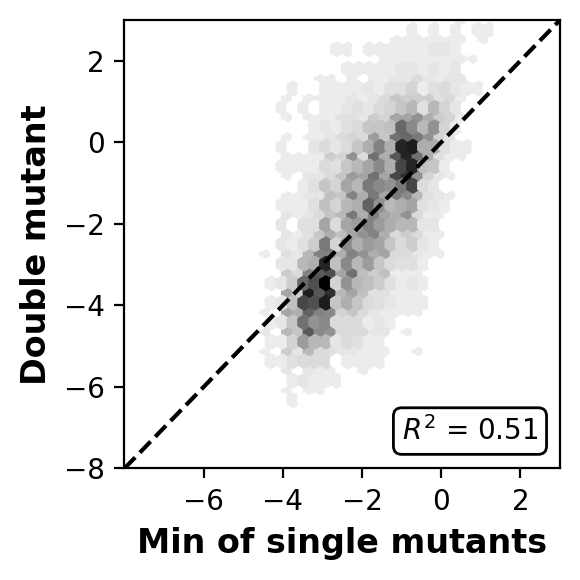

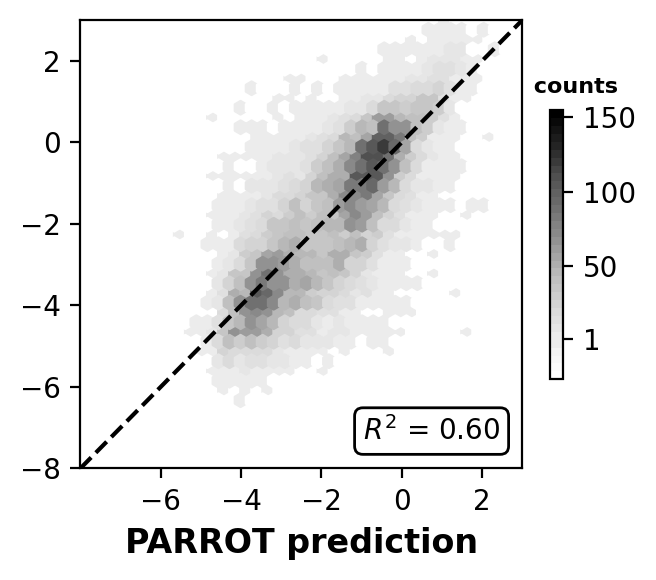

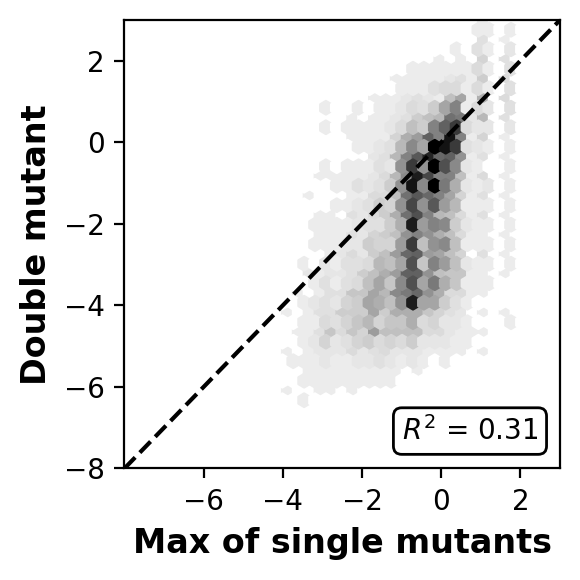

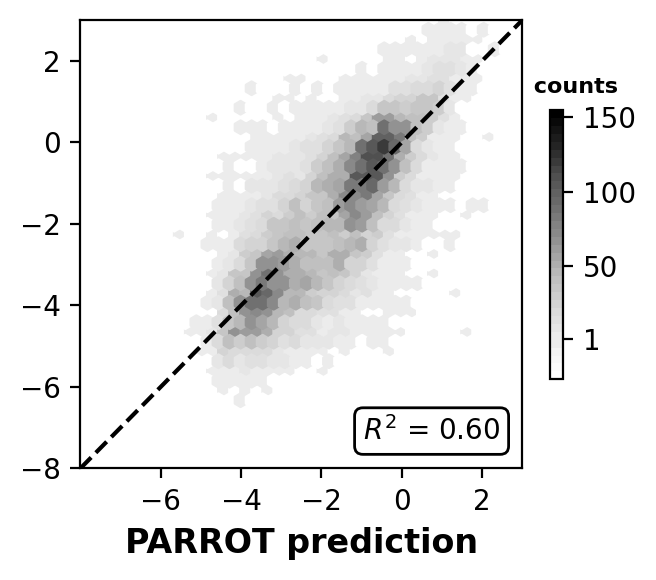

In [127]:
# Supplemental Figure 4
results = graph_epistasis(singles_df, doubles_df, mode='avg') 
                            # savefig1='SUP3_AB42_avg_epistasis.png')
results = graph_epistasis(singles_df, doubles_df, mode='min') 
                            # savefig1='SUP3_AB42_min_epistasis.png')
results = graph_epistasis(singles_df, doubles_df, mode='max') 
                            # savefig1='SUP3_AB42_max_epistasis.png')

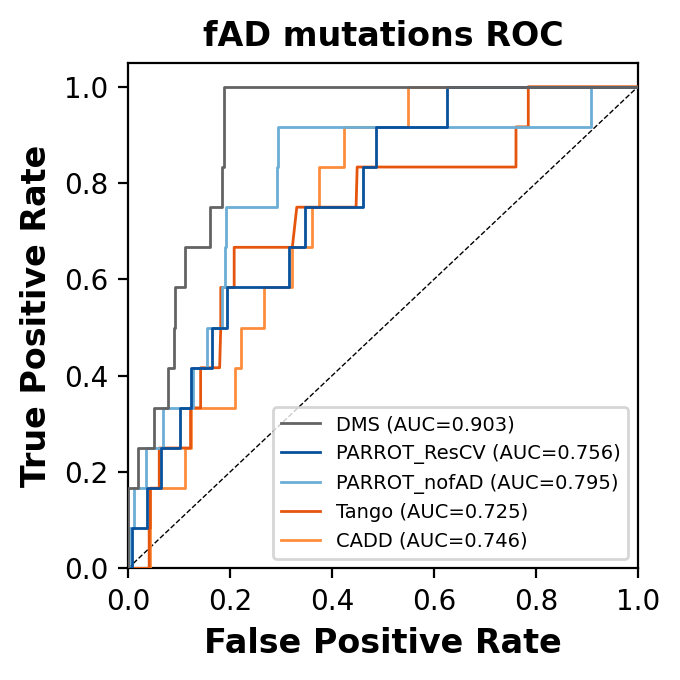

In [124]:
# Panel D: fAD mutant ROC
fAD_dom_mutants = ['H6R', 'D7N', 'D7H', 'E11K', 'K16N', 'A21G', 
                   'E22G', 'E22K', 'E22Q', 'D23N', 'L34V', 'A42T']

# Helper functions
def read_predictions_file(file):
    with open(file) as f:
        lines = [x.strip().split() for x in f]

    df = pd.DataFrame(columns=['name', 'seq', 'DMS', 'PARROT_ResCV'])
    for i in range(0, len(lines), 2):
        sample = lines[i]
        df = df.append({'name':sample[0][:-5], 'seq':sample[1], 
                'DMS':float(sample[2]), 'PARROT_ResCV':float(lines[i+1][2])},
                ignore_index=True)
    return df

def convert_name(s):
    return s.replace('-', '')

# Read in PARROT ResCV data
df = read_predictions_file('ab_nucleation/resCV_single_mutant_predictions.tsv')

# Set 'fAD' column depending on whether mutant is fAD dom mutant
df['fAD'] = 0
for i in range(len(df)):
    if df['name'].iloc[i] in fAD_dom_mutants:
        df.at[i, 'fAD'] = 1
        
# Read in held-out fAD predictions
df_nofAD = pd.read_csv('ab_nucleation/nofAD_single_mutant_predictions.tsv', 
            sep=' ', names=['name', 'seq', 'PARROT_nofAD'])
df_nofAD = df_nofAD.drop('seq', axis=1)
df = pd.merge(df, df_nofAD, on='name')

# Read in predictions from external predictors
filename = 'ab_nucleation/external_tool_predictions.tsv'
df2 = pd.read_csv(filename, sep=' ')

single_mask = df2['ID'].str.len() < 7
df2 = df2.loc[single_mask]

df2['name'] = df2['ID'].apply(convert_name)
df2 = df2.drop('ID', axis=1)
df2['Polyphen'] = -1 * df2['Polyphen']
df2['CADD'] = -1 * df2['CADD']
df2['Camsol'] = -1 * df2['Camsol']

df = pd.merge(df, df2, on='name') # Combine with other DataFrame

# plot ROC
predictions = ['DMS', 'PARROT_ResCV', 'PARROT_nofAD', 'Tango', 'CADD']
roc_colors = [dark_gray, dark_blue, light_blue, dark_orange, light_orange]
y = df.fAD.values

plt.figure(figsize=(3.5,3.5), dpi=200)
lw = 1
plt.plot([0, 1], [0, 1], color='black', lw=lw/2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('fAD mutations ROC', fontsize=12, fontweight='bold')

for i in range(len(predictions)):
    pred_type = predictions[i]
    color = roc_colors[i]
    scores = df[pred_type].values
    layer = 10 - i

    fpr, tpr, thresholds = roc_curve(y, scores)
    roc_auc = auc(fpr, tpr)

    label_str = '%s (AUC=%.3f)' % (pred_type, roc_auc)
    plt.plot(fpr, tpr, lw=lw, alpha=1, c=color, zorder=layer, label=label_str)

plt.legend(loc="lower right", fontsize=7)
plt.tight_layout()
# plt.savefig('fAD_ROC.png')